## 기울기 소실(Gradient Vanishing)과 폭주(Exploding)

- 기울기 소실(Gradient Vanishing) : 입력층으로 갈 수록 기울기(Gradient)가 점차적으로 작아지는 현상
- 기울기 폭주(Gradient Exploding) : 기울기가 점차 커지더니 가중치들이 비정상적으로 큰 값이 되면서 결국 발산

#### ReLU와 ReLU의 변형들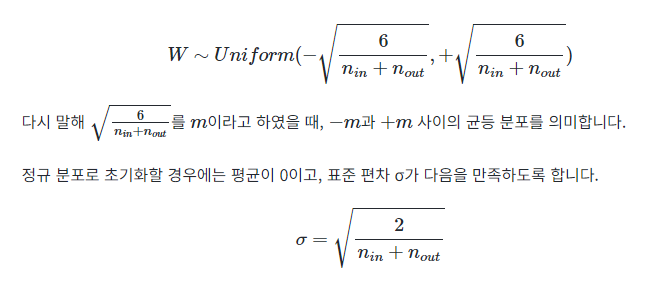

-  시그모이드 함수를 사용하면 입력의 절대값이 클 경우에 시그모이드 함수의 출력값이 0 또는 1에 수렴하면서 기울기가 0에 가까워짐 
- 가장 쉬운 해결 방법 : ReLU나 ReLU의 변형 함수와 같은 Leaky ReLU를 사용


#### 가중치 초기화(Weight initialization)

- 같은 모델을 훈련시키더라도 가중치가 초기에 어떤 값을 가졌느냐에 따라서 모델의 훈련 결과가 달라짐 
- 가중치 초기화만 적절히 해줘도 기울기 소실 문제과 같은 문제를 완화

1) 세이비어 초기화(Xavier Initialization)

- 균등 분포(Uniform Distribution) 또는 정규 분포(Normal distribution)로 초기화 할 때 두 가지 경우로 나뉘며, 이전 층의 뉴런 개수와 다음 층의 뉴런 개수를 가지고 식을 세움

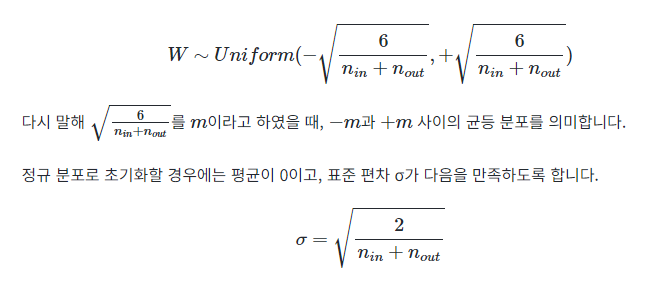

2) He 초기화(He initialization)

- 세이비어 초기화와 유사하게 정규 분포와 균등 분포 두 가지 경우로 나뉨
- 세이비어 초기화와 다르게 다음 층의 뉴런의 수를 반영하지 않음

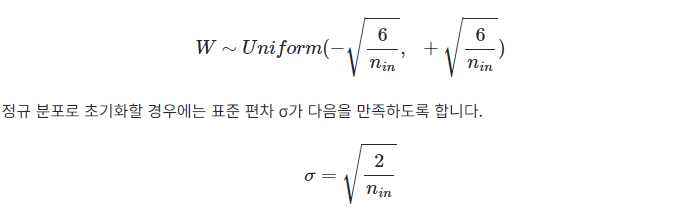

- 시그모이드 함수나 하이퍼볼릭탄젠트 함수를 사용할 경우에는 세이비어 초기화 방법이 효율적
- ReLU 계열 함수를 사용할 경우에는 He 초기화 방법이 효율적
- ReLU + He 초기화 방법이 좀 더 보편적

#### 배치 정규화(Batch Normalization)

- 인공 신경망의 각 층에 들어가는 입력을 평균과 분산으로 정규화하여 학습을 효율적으로 만듬

1) 내부 공변량 변화(Internal Covariate Shift)

-  학습 과정에서 층 별로 입력 데이터 분포가 달라지는 현상
-  기울기 소실/폭주 등의 딥 러닝 모델의 불안전성이 층마다 입력의 분포가 달라지기 때문

- 공변량 변화는 훈련 데이터의 분포와 테스트 데이터의 분포가 다른 경우를 의미
-  공변량 변화는 신경망 층 사이에서 발생하는 입력 데이터의 분포 변화를 의미

2) 배치 정규화(Batch Normalization)
-  한 번에 들어오는 배치 단위로 정규화
- 배치 정규화는 각 층에서 활성화 함수를 통과하기 전에 수행
-  입력에 대해 평균을 0으로 만들고, 정규화를 잔향 그리고 정규화 된 데이터에 대해서 스케일과 시프트를 수행. 이 때 두 개의 매개변수 γ와 β를 사용하는데, γ는 스케일을 위해 사용하고, β는 시프트를 하는 것에 사용하며 다음 레이어에 일정한 범위의 값들만 전달

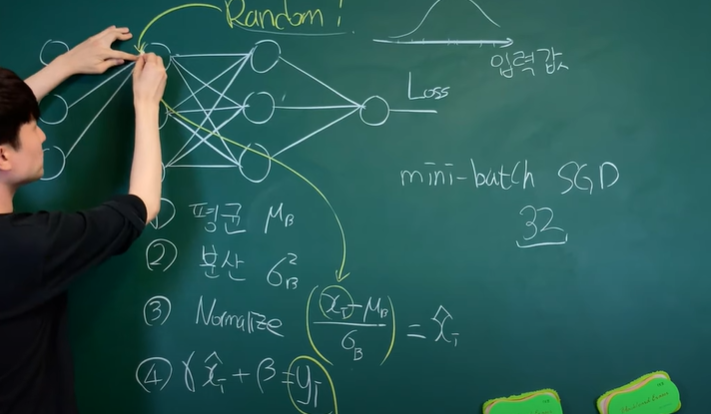

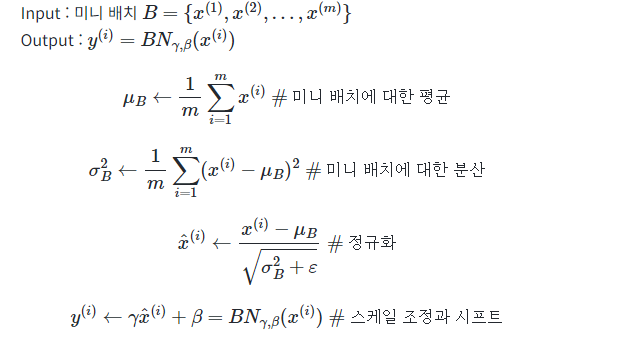

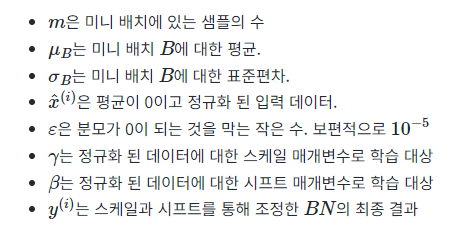

- 배치 정규화는 학습 시 배치 단위의 평균과 분산들을 차례대로 받아 이동 평균과 이동 분산을 저장해놓았다가 테스트 할 때는 해당 배치의 평균과 분산을 구하지 않고 학습에서 구해놓았던 평균과 분산으로 정규화

- 배치 정규화를 사용하면 시그모이드 함수나 하이퍼볼릭탄젠트 함수를 사용하더라도 기울기 소실 문제가 크게 개선
- 가중치 초기화에 훨씬 덜 민감
- 훨씬 큰 학습률을 사용할 수 있어 학습 속도를 개선
- 미니 배치마다 평균과 표준편차를 계산하므로 훈련 데이터에 일종의 잡음을 넣는 부수 효과로 과적합을 방지 하지만, 부수적 효과이므로 드롭 아웃과 함께 사용하는 것이 좋음
- 배치 정규화는 모델을 복잡하게 하며, 추가 계산을 하는 것이므로 테스트 데이터에 대한 예측 시에 실행 시간이 느려짐

3) 배치 정규화의 한계

- 미니 배치 크기에 의존적 
    - 작은 미니 배치에서는 배치 정규화의 효과가 극단적으로 작용되어 훈련에 악영향을 줄 수 있음
    
- RNN에 적용하기 어려움
    - RNN은 각 시점(time step)마다 다른 통계치를 가집니다. 이는 RNN에 배치 정규화를 적용하는 것을 어려움
    - 층 정규화(layer normalization)라는 방법 사용 권고

#### 층 정규화(Layer Normalization) 


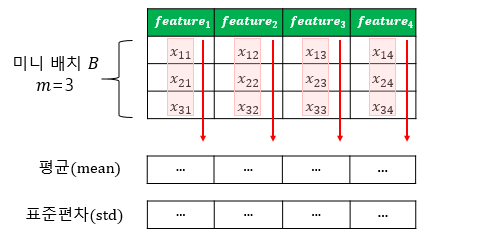
- 미니 배치란 동일한 특성(feature) 개수들을 가진 다수의 샘플들을 의미

- 반면, 층 정규화는 

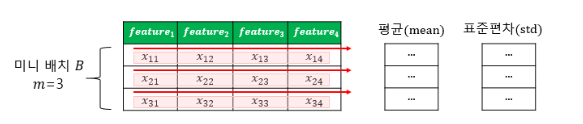

#### MNIST 실습 

In [30]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import torch.nn as nn
import matplotlib.pylab as plt 

In [31]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

torch.manual_seed(1)
if device == 'cuda':
    torch.cuda.manual_seed(1)

In [32]:
# parameters 
learning_rate = 0.01
training_epochs = 5
batch_size = 32 

In [33]:
# MNIST dataset 
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

In [34]:
mnist_train.data.shape

torch.Size([60000, 28, 28])

In [35]:
# dataset Loader 
train_loader = torch.utils.data.DataLoader(dataset=mnist_train, 
                                          batch_size=batch_size,
                                          shuffle=True, 
                                          drop_last=True)

test_loader = torch.utils.data.DataLoader(dataset=mnist_test,
                                          batch_size=batch_size,
                                          shuffle=False,
                                          drop_last=True)


In [36]:
class MNIST_Architectire(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(MNIST_Architectire, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size, bias=True)
        self.linear2 = nn.Linear(hidden_size, hidden_size, bias=True)
        self.linear3 = nn.Linear(hidden_size, num_classes)
        
        self.relu = torch.nn.ReLU()
        self.bn1 = torch.nn.BatchNorm1d(hidden_size)
        self.bn2 = torch.nn.BatchNorm1d(hidden_size)
    
    def forward(self, x):
        out = self.linear1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.linear2(out)
        
        out = self.bn2(out)
        out = self.relu(out)
        out = self.linear3(out)
        
        return out
        

In [37]:
bn_model = MNIST_Architectire(28*28, 32, 10)

In [38]:
# define cost/loss & optimizer
criterion = torch.nn.CrossEntropyLoss().to(device)
bn_optimizer = torch.optim.Adam(bn_model.parameters(), lr=learning_rate)

In [39]:
train_losses = []
train_accs = []

valid_losses = []
valid_accs = []

train_total_batch = len(train_loader)
test_total_batch = len(test_loader)

In [41]:
for epoch in range(training_epochs):
    bn_model.train()
   
    for X, Y in train_loader:
        # reshape image into [batch_size by 784]
        
        # label is not one-hot encoded 
        X = X.view(-1, 28*28).to(device)
        
        Y = Y.to(device)
        
        bn_optimizer.zero_grad()
        bn_prediction = bn_model(X)
        bn_loss = criterion(bn_prediction, Y)
        bn_loss.backward()
        bn_optimizer.step()
    print(f"epoches : {epoch}")

epoches : 0
epoches : 1
epoches : 2
epoches : 3
epoches : 4


In [44]:
with torch.no_grad():
    bn_model.eval()     # set the model to evaluation mode

    # Test the model using train sets
    bn_loss, nn_loss, bn_acc, nn_acc = 0, 0, 0, 0
    for i, (X, Y) in enumerate(train_loader):
        X = X.view(-1, 28 * 28).to(device)
        Y = Y.to(device)

        bn_prediction = bn_model(X)
        bn_correct_prediction = torch.argmax(bn_prediction, 1) == Y
        bn_loss += criterion(bn_prediction, Y)
        bn_acc += bn_correct_prediction.float().mean()

    bn_loss,  bn_acc, = bn_loss / train_total_batch, bn_acc / train_total_batch
    
    print('train data accuracy : {0:.4f}'.format(bn_acc))
    
    
    bn_loss, bn_acc  = 0, 0
    for i, (X, Y) in enumerate(test_loader):
        X = X.view(-1, 28 * 28).to(device)
        Y = Y.to(device)

        bn_prediction = bn_model(X)
        bn_correct_prediction = torch.argmax(bn_prediction, 1) == Y
        bn_loss += criterion(bn_prediction, Y)
        bn_acc += bn_correct_prediction.float().mean()

    bn_loss,  bn_acc = bn_loss / test_total_batch, bn_acc / test_total_batch
    print('test data accuracy : {0:.4f}'.format(bn_acc))


print('Learning finished')

train data accuracy : 0.9790
test data accuracy : 0.9665
Learning finished


예측 결과 : 9
이 이미지 데이터의 정답 레이블은 9 입니다


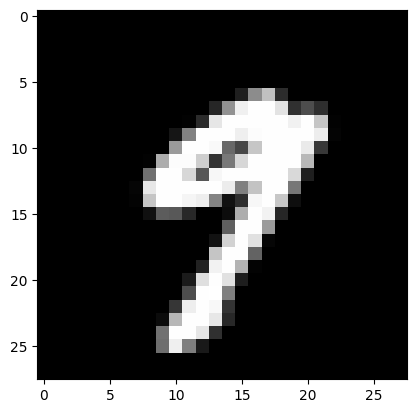

In [98]:
index = 20

bn_model.eval()
data = mnist_test[index][0].view(-1, 28 * 28).to(device)
output = bn_model(data)
predicted = torch.argmax(output.data, 1)

print("예측 결과 : {}".format(predicted[0]))

test_show = (mnist_test[index][0]).numpy()
plt.imshow(test_show.reshape(28, 28), cmap='gray')
print("이 이미지 데이터의 정답 레이블은 {:.0f} 입니다".format(mnist_test[index][1]))